# Algorithm Analysis and Big-Oh Notations

<!-- ## 2.1. Objectives -->
## Objectives
* To understand why algorithm analysis is important.
* To be able to use “Big-O” to describe execution time.
* To understand the “Big-O” execution time of common operations on Python lists and dictionaries.
* To understand how the implementation of Python data impacts algorithm analysis.
* To understand how to benchmark simple Python programs.


<!-- ## 2.2. What Is Algorithm Analysis? -->
## What Is Algorithm Analysis?
**Algorithm analysis**: Compare algorithms based upon the amount of computing resources that each algorithm uses.
* The amount of space or memory an algorithm requires.
* The amount of time an algorithm requires to execute, a.k.a., “execution time” or “running time”.

Use `time` function to return the current system clock time (in seconds). The execution time is the difference between the starting time and ending time of an algorithm.

In [1]:
import time
def sumOfN(n):
    start = time.time()
    theSum = 0
    for i in range(1,n+1):
        theSum = theSum + i
    end = time.time()
    return theSum,end-start

In [2]:
print("Sum is %15d required %10.7f seconds"%sumOfN(10000))
print("Sum is %15d required %10.7f seconds"%sumOfN(30000))
print("Sum is %15d required %10.7f seconds"%sumOfN(100000))
print("Sum is %15d required %10.7f seconds"%sumOfN(300000))
print("Sum is %15d required %10.7f seconds"%sumOfN(1000000))

Sum is        50005000 required  0.0009923 seconds
Sum is       450015000 required  0.0019855 seconds
Sum is      5000050000 required  0.0044599 seconds
Sum is     45000150000 required  0.0139003 seconds
Sum is    500000500000 required  0.0466104 seconds


The execution time of `sumOfN` grows linearly with the number of integers being added.

In [3]:
import time

def sumOfN2(n):
    start = time.time()
    theSum = (n*(n+1))/2
    end = time.time()
    return theSum,end-start

In [4]:
print("Sum is %15d required %10.7f seconds"%sumOfN2(10000))
print("Sum is %15d required %10.7f seconds"%sumOfN2(30000))
print("Sum is %15d required %10.7f seconds"%sumOfN2(100000))
print("Sum is %15d required %10.7f seconds"%sumOfN2(300000))
print("Sum is %15d required %10.7f seconds"%sumOfN2(1000000))

Sum is        50005000 required  0.0000000 seconds
Sum is       450015000 required  0.0000000 seconds
Sum is      5000050000 required  0.0000000 seconds
Sum is     45000150000 required  0.0000000 seconds
Sum is    500000500000 required  0.0000000 seconds


The execution time of `sumOfN2` is much shorter than `sumOfN`. The execution time is too short and beyond the precision of the `time` function. Function `sumOfN3` illustrates how to more accurately measure functions with very short execution time.

In [6]:
import time

def sumOfN3(n):
    start = time.time()
    for k in range(1,10000001):
        theSum,_ = sumOfN2(n)
    end = time.time()
    return theSum, (end-start)/10000000

print("Sum is %15d required %10.7f seconds"%sumOfN3(10000))
print("Sum is %15d required %10.7f seconds"%sumOfN3(30000))
print("Sum is %15d required %10.7f seconds"%sumOfN3(100000))
print("Sum is %15d required %10.7f seconds"%sumOfN3(300000))
print("Sum is %15d required %10.7f seconds"%sumOfN3(1000000))

Sum is        50005000 required  0.0000004 seconds
Sum is       450015000 required  0.0000003 seconds
Sum is      5000050000 required  0.0000004 seconds
Sum is     45000150000 required  0.0000003 seconds
Sum is    500000500000 required  0.0000003 seconds


We observe that the execution time of `sumOfN2` is hardly impacted by the number of integers being added.

We may also perform cross-platform timing measurements with the `timeit` module, which runs functions in a consistent environment and uses timing mechanisms that are as similar as possible across operating systems.

In [7]:
import timeit

print(timeit.timeit('sumOfN2(10000)', setup="from __main__ import sumOfN2", number=1000), "milliseconds")
print(timeit.timeit('sumOfN2(30000)', setup="from __main__ import sumOfN2", number=1000), "milliseconds")
print(timeit.timeit('sumOfN2(100000)', setup="from __main__ import sumOfN2", number=1000), "milliseconds")
print(timeit.timeit('sumOfN2(300000)', setup="from __main__ import sumOfN2", number=1000), "milliseconds")
print(timeit.timeit('sumOfN2(1000000)', setup="from __main__ import sumOfN2", number=1000), "milliseconds")

0.0003101999998307292 milliseconds
0.00030990000004749163 milliseconds
0.000312299999905008 milliseconds
0.000326500000028318 milliseconds
0.00031110000008993666 milliseconds


Here `from __main__ import sumOfN2` imports the function `sumOfN2` from the `__main__` namespace into the namespace that `timeit` sets up for the timing experiment. By doing this, the `timeit` module can run the timing tests in an environment that is uncluttered by any stray variables irrelevent to the experiment, that may interfere with your function’s performance in some unforeseen way.

Disclaimer: The time measured includes function calling overhead.

<!-- ## 2.3. Big-O Notation -->
## Big-O Notation

The actual execution time is dependent on the particular machine, program, time of day, compiler, and programming language. To compare algorithms across implementations, we need a measure which is independent of the program or computer being used.

If we consider each step or operation in the algorithm as a basic unit of computation, then the execution time can be expressed as the number of steps required to solve the problem. A basic unit of computation could be any operation that takes a fixed amount of time to compute. For instance, in the summation algorithm each assignment can be considered a basic unit of computation. The number of assignments in `sumOfN(n)`, where n is often referred to as the *size of the problem*, is $T(n)=n+1$. We can read this as “T(n)=n+1 is the time it takes to solve a problem of size n.”

```python
import time
def sumOfN(n):
    start = time.time()
    theSum = 0                 # 1 assignment
    for i in range(1,n+1):
        theSum = theSum + i    # n assignments
    end = time.time()
    return theSum,end-start
```

What we care most is *how the algorithm’s execution time changes with respect to the size of the problem*. Computer scientists are more interested in the most dominant part of the T(n) as the problem gets larger.

The **order of magnitude** function describes the part of T(n) that increases the fastest as the value of n grows large. Here are some common order of magnitude functions:

  $\phi(n)$    |   Name
-------------- | -------------
$1$            | Constant
$log~n$        | Logarithmic
$n$            | Linear
$n~log~n$      | Log Linear
$n^2$          | Quadratic
$n^3$          | Cubic
$2^n$          | Exponential

<img src="figures/order_magnitude_comparison.jpg">

## Formal Definition of Big-Oh Notation

Order of magnitude is often described by **Big-O** notation O(f(n)), which provides a simple approximation to the actual number of steps in the computation T(n).

Let $T(n)$ be some real function, $\phi(n)$ be some positive function. We say
* $T(n) \in O(\phi(n))$, if there are positive constants $c$ and $n_0$ such that $|T(n)| \leq c \phi(n)$ when $n \geq n_0$. In other words,
$$\lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)} < \infty$$
We say that $\phi(n)$ is an **asymptotic upper bound** for $T(n)$.
* $T(n) \in \Omega(\phi(n))$, if there are positive constants $c$ and $n_0$ such that $|T(n)| \geq c \phi(n)$ when $n \geq n_0$. In other words,
$$\lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} > 0$$
We say that $\phi(n)$ is an **asymptotic lower bound** for $T(n)$.
* $T(n) \in \Theta(\phi(n))$, if and only if $T(n) \in O(\phi(n))$ and $T(n) \in \Omega(\phi(n))$. In other words,
$$0 < \lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} \leq \lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)} < \infty$$
We say that $T(n)$ is growing at the same rate as $\phi(n)$.
* $T(n) \in o(\phi(n))$, if for all constants $c > 0$ there exists an $n_0$ such that $|T(n)| < c \phi(n)$ when $n \geq n_0$. In other words,
$$\lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)} = 0$$
* $T(n) \in \omega(\phi(n))$, if for all constants $c > 0$ there exists an $n_0$ such that $|T(n)| > c \phi(n)$ when $n \geq n_0$. In other words,
$$\lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} = \infty$$

---
**Proof of iff conditions**
* Prove that
$$T(n) \in O(\phi(n)) \Leftrightarrow \lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)} < \infty$$
  __*Proof:*__
  + Suppose $T(n) \in O(\phi(n))$. Then there exists $c > 0, n_0 > 0$ such that $|T(m)| \leq c\phi(m), ~~ \forall m \geq n_0$.     In other words,
    $$\sup_{m \geq n_0} \frac{|T(m)|}{\phi(m)} \leq c$$
    Since $\sup_{m \geq n} \frac{|T(m)|}{\phi(m)}$ is a monotonically decreasing function of $n$, therefore
    $$\lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)} \leq \sup_{m \geq n_0} \frac{|T(m)|}{\phi(m)} \leq c < \infty$$
  + Suppose $\lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)} = c' < \infty$. Then there exists $c > c'$, $n_0 > 0$ such that
    $$\sup_{m \geq n} \frac{|T(m)|}{\phi(m)} < c, \forall n \geq n_0$$
    In particular $\sup_{m \geq n_0} \frac{|T(m)|}{\phi(m)} < c$, that is,
    $$\frac{|T(m)|}{\phi(m)} < c, \forall m \geq n_0$$
    Hence $T(n) \in O(\phi(n))$.
    
* Prove that
$$T(n) \in \Omega(\phi(n)) \Leftrightarrow \lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} > 0$$
  __*Proof:*__
  + Suppose $T(n) \in \Omega(\phi(n))$. Then there exists $c > 0, n_0 > 0$ such that $|T(m)| \geq c\phi(m), ~~ \forall m \geq n_0$. In other words,
    $$\inf_{m \geq n_0} \frac{|T(m)|}{\phi(m)} \geq c$$
    Since $\inf_{m \geq n} \frac{|T(m)|}{\phi(m)}$ is a monotonically increasing function of $n$, therefore
    $$\lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} \geq \inf_{m \geq n_0} \frac{|T(m)|}{\phi(m)} \geq c > 0$$
  + Suppose $\lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} = c' > 0$. Then there exists $0 < c < c'$ and $n_0 > 0$ such that $\inf_{m \geq n_0} \frac{|T(m)|}{\phi(m)} > c$. In other words, 
  $$\frac{|T(m)|}{\phi(m)} > c, \forall m \geq n_0$$
  Hence $T(n) \in \Omega(\phi(n))$.
    
---

---
**NOTE**

If $\lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)}$ exists, then
$$\lim_{n \rightarrow \infty} \inf_{m \geq n} \frac{|T(m)|}{\phi(m)} = \lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)} = \lim_{n \rightarrow \infty} \sup_{m \geq n} \frac{|T(m)|}{\phi(m)}$$
Therefore

$$T(n) \in O(\phi(n)) \Leftrightarrow \lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)} < \infty$$
$$T(n) \in \Omega(\phi(n)) \Leftrightarrow \lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)} > 0$$
$$T(n) \in \Theta(\phi(n)) \Leftrightarrow 0 < \lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)} < \infty$$
$$T(n) \in o(\phi(n)) \Leftrightarrow \lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)} = 0$$
$$T(n) \in \omega(\phi(n)) \Leftrightarrow \lim_{n \rightarrow \infty} \frac{|T(n)|}{\phi(n)} = \infty$$

---

## Properties of Big-Oh Notation
Assume all functions are positive.

* $f \in O(g)$ if and only if $g \in \Omega(f)$.
* $\Theta$ is an equivalence relation, namely
  + $f \in \Theta(f)$
  + If $f \in \Theta(g)$, then $g \in \Theta(f)$.
  + If $f \in \Theta(g)$ and $g \in \Theta(h)$, then $f \in \Theta(h)$.
* $O$ is a (non-strict) partial ordering, namely
  + $f \in O(f)$.
  + If $f \in O(g)$ and $g \in O(f)$, then $f \in \Theta(g)$.
  + If $f \in O(g)$ and $g \in O(h)$, then $f \in O(h)$.
* $\Omega$ is a (non-strict) partial ordering.
  + $f \in \Omega(f)$.
  + If $f \in \Omega(g)$ and $g \in \Omega(f)$, then $f \in \Theta(g)$.
  + If $f \in \Omega(g)$ and $g \in \Omega(h)$, then $f \in \Omega(h)$.
* $o$ is a strict partial ordering.
  + $f \not\in o(f)$.
  + If $f \in o(g)$ and $g \in o(h)$, then $f \in o(h)$.
  + If $f \in o(g)$ then $g \not\in o(f)$.
* $\omega$ is a strict partial ordering.
  + $f \not\in \omega(f)$.
  + If $f \in \omega(g)$ and $g \in \omega(h)$, then $f \in \omega(h)$.
  + If $f \in \omega(g)$ then $g \not\in \omega(f)$.

* Constant factors can be ignored.
  + $kT(n) \in \Theta(T(n)), \forall k > 0$
* Higher power grows faster
  + $n^r \in O(n^s), \forall r \leq s$
* Fastest growing term dominates a sum
  + $f(n) \in O(g(n)) \Rightarrow f(n) + g(n) \in \Theta(g(n))$
  + Ex. $5n^2+27n+1005 \in O(n^2)$
* Polynomial's growth is determined by leading term.
  + If $f(n)$ is a polynomial of degree $d$, then $f(n) \in \Theta(n^d)$.
* Product of asymptotic upper bounds is asymptotic upper bounds for products
  + If $f_1(n) \in O(g_1(n))$ and $f_2(n) \in O(g_2(n))$, then $f_1(n)f_2(n) \in O(g_1(n)g_2(n))$.
* Exponential functions grow faster than powers
  + $n^k \in o(b^n), \forall b > 1$
  + Ex. $n^{100} \in O(1.01^n)$
* Logarithmic grows slower than powers
  + $\log_b n \in o(n^k), \forall b > 1$ and $k > 0$.
  + Ex. $\log_2 n \in O(n^{1/3})$.
* All logarithms grow at the same rate
  + $\log_b n \in \Theta(\log_d n), \forall b,d > 1$.
* Sum of the first $n$ $r$'th power grows as the $(r+1)$'th power
  + $\sum_{k=1}^n k^r \in \Theta(n^{r+1})$, for all $r > -1$.
  + Ex. $\sum_{k=1}^n k = \frac{n(n+1)}{2} \in \Theta(n^2)$.

The performance of an algorithm may also depend on the exact values of the data, specified by the **best case**, **worst case**, and **average case** performance.

## Analyzing an Algorithm

* Simple statement sequence
```python
    Statement_1  # O(1)
    Statement_2  # O(1)
    ...
    Statement_k  # O(1)
```
  + Time complexity is $O(1)$ as long as $k$ is constant
  
* Simple loops
```python
    for i in range(n):
        Statement  # O(1)
```
  + Time complexity is $O(n)$
  
* Nested loops
```python
    for i in range(n):
        for j in range(n):
            Statement  # O(1)
```
  + Time complexity is $O(n^2)$
  
* Loop index does't vary linearily
```python
    while h <= n:
        h = h*2
```
  + h = 1,2,4,8,... until exceeding n
  + Time complexity is $O(\log_2 n)$

* Loop index depends on outer loop index
```python
    for i in range(n):
        for j in range(i):
            Statement  # O(1)
```
  + Inner loop executed $1+2+...+n = \frac{n(n+1)}{2}$ times
  + Time complexity $O(n^2)$

Let's analyze the time complexity for the following algorithms:

Example 1:
```python
def myFunc(n):
    x = 0
    y = 0
    z = 0
    u = 0
    v = 0
    w = 0
    for i in range(n):
        for j in range(n):
            x = x + i * i
            y = y + i * j
            z = z + j * j
    for k in range(n):
        u = w + (5*k + 45)
        v = v + k*k*k
    w = u+v
    return w
```
Example 2:
```python
def maxSubSum(myArray):
    maxSum = 0
    idx_start = -1
    idx_end = -1
    for i in range(0, len(myArray)):
        for j in range(i, len(myArray)):
            thisSum = 0
            for k in range(i,j+1):
                thisSum = thisSum + myArray[k]
            if thisSum > maxSum:
                maxSum = thisSum
                idx_start = i
                idx_end = j
    return maxSum,idx_start,idx_end
```

<!-- ## 2.6 Python Built-in List Operation Time Complexity -->
## Python Built-in List Operation Time Complexity

Let’s look at four different ways to generate a list of $n$ numbers starting with 0.

In [7]:
def test1():   # concat: [a]+[b] produces a new list with the result [a,b]
    l = []
    for i in range(1000):
        l = l + [i]

def test2():   # append: in place append to the list
    l = []
    for i in range(1000):
        l.append(i)

def test3():   # comprehension: iterates over each elements in expression
    l = [i for i in range(1000)]

def test4():   # list range
    l = list(range(1000))

In [8]:
import timeit
print("concat        ",timeit.timeit('test1()', setup="from __main__ import test1", number= 500), "milliseconds")
print("concat        ",timeit.timeit('test1()', setup="from __main__ import test1", number=1000), "milliseconds")
print("concat        ",timeit.timeit('test1()', setup="from __main__ import test1", number=1500), "milliseconds")
print("concat        ",timeit.timeit('test1()', setup="from __main__ import test1", number=2000), "milliseconds")

print("append        ",timeit.timeit('test2()', setup="from __main__ import test2", number= 500), "milliseconds")
print("append        ",timeit.timeit('test2()', setup="from __main__ import test2", number=1000), "milliseconds")
print("append        ",timeit.timeit('test2()', setup="from __main__ import test2", number=1500), "milliseconds")
print("append        ",timeit.timeit('test2()', setup="from __main__ import test2", number=2000), "milliseconds")

print("comprehension ",timeit.timeit('test3()', setup="from __main__ import test3", number= 500), "milliseconds")
print("comprehension ",timeit.timeit('test3()', setup="from __main__ import test3", number=1000), "milliseconds")
print("comprehension ",timeit.timeit('test3()', setup="from __main__ import test3", number=1500), "milliseconds")
print("comprehension ",timeit.timeit('test3()', setup="from __main__ import test3", number=2000), "milliseconds")

print("list range    ",timeit.timeit('test4()', setup="from __main__ import test4", number= 500), "milliseconds")
print("list range    ",timeit.timeit('test4()', setup="from __main__ import test4", number=1000), "milliseconds")
print("list range    ",timeit.timeit('test4()', setup="from __main__ import test4", number=1500), "milliseconds")
print("list range    ",timeit.timeit('test4()', setup="from __main__ import test4", number=2000), "milliseconds")

concat         0.541423 milliseconds
concat         1.0283157000000003 milliseconds
concat         1.4951176 milliseconds
concat         1.9712788999999997 milliseconds
append         0.02839849999999977 milliseconds
append         0.05167430000000017 milliseconds
append         0.08005849999999981 milliseconds
append         0.10346279999999997 milliseconds
comprehension  0.013607600000000275 milliseconds
comprehension  0.026730699999999885 milliseconds
comprehension  0.040332800000000724 milliseconds
comprehension  0.05368200000000023 milliseconds
list range     0.005281599999999997 milliseconds
list range     0.010542500000000565 milliseconds
list range     0.016425399999999257 milliseconds
list range     0.022147399999999706 milliseconds


Actual implementation of Python built-in `list` (See *listobject.h*):

```C++
typedef struct {
    PyObject_VAR_HEAD
    /* Vector of pointers to list elements.  list[0] is ob_item[0], etc. */
    PyObject **ob_item;

    /* ob_item contains space for 'allocated' elements.  The number
     * currently in use is ob_size.
     * Invariants:
     *     0 <= ob_size <= allocated
     *     len(list) == ob_size
     *     ob_item == NULL implies ob_size == allocated == 0
     * list.sort() temporarily sets allocated to -1 to detect mutations.
     *
     * Items must normally not be NULL, except during construction when
     * the list is not yet visible outside the function that builds it.
     */
    Py_ssize_t allocated;
} PyListObject;
```

<img src="figures/python_list_implementation.jpg">

In Python’s implementation, when an item is taken from the front of the list, all the other elements in the list are shifted one position closer to the beginning. For instance, what `pop(2)` does is as follows:

<img src="figures/python_list_pop.jpg">

Though it causes $O(n)$ time for pop operation, this allows the index operation to be $O(1)$. This is a tradeoff that the Python implementors makes based on how people most commonly use the list data structure. The implementation is optimized so that the most common operations were very fast, sometimes by sacrificing the performance of less common operations.


Operation        |  Big-O Efficiency
---------------- | -----------------
index []         | O(1)
index assignment | O(1)
append           | O(1)
pop()            | O(1)
pop(i)           | O(n)
insert(i,item)   | O(n)
del operator     | O(n)
iteration        | O(n)
contains (in)    | O(n)
get slice [x:y]  | O(k)
del slice        | O(n)
reverse          | O(n)
concatenate      | O(k)
sort             | O(n log n)
multiply         | O(nk)

<!-- set slice        | (n+k) -->


In [9]:
kkk = [1,2,3,4,5]
del kkk[2]
print(kkk)
lll = [1,2,3,4,5]
lll.pop(2)
print(lll)

[1, 2, 4, 5]
[1, 2, 4, 5]


In [1]:
import timeit

pz_rec = []
pe_rec = []
i_rec = []

print("%9s %15s %15s"%("size","pop(0)","pop()"))
for i in range(100000,10000001,100000):
    x = list(range(i))
    pz = timeit.timeit('x.pop(0)', setup="from __main__ import x", number=1000)
    x = list(range(i))
    pe  = timeit.timeit('x.pop()', setup="from __main__ import x", number=1000)
    pz_rec.append(pz)
    pe_rec.append(pe)
    i_rec.append(i)
    print("%9d %15.5f, %15.5f" %(i, pz, pe))

     size          pop(0)           pop()
   100000         0.02324,         0.00005
   200000         0.04148,         0.00007
   300000         0.05872,         0.00005
   400000         0.07856,         0.00005
   500000         0.10253,         0.00006
   600000         0.12224,         0.00006
   700000         0.15180,         0.00009
   800000         0.21364,         0.00006
   900000         0.27790,         0.00006
  1000000         0.34208,         0.00008
  1100000         0.52433,         0.00008
  1200000         0.61718,         0.00006
  1300000         0.56206,         0.00006
  1400000         0.65420,         0.00006
  1500000         0.71495,         0.00006
  1600000         0.73226,         0.00006
  1700000         0.79771,         0.00006
  1800000         0.81567,         0.00006
  1900000         0.87555,         0.00005
  2000000         0.94878,         0.00007
  2100000         0.99743,         0.00005
  2200000         1.07109,         0.00006
  2300000   

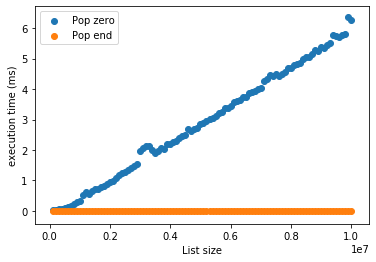

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(np.asarray(i_rec), np.asarray(pz_rec))
plt.scatter(np.asarray(i_rec), np.asarray(pe_rec))

plt.legend(["Pop zero", "Pop end"])
plt.xlabel("List size")
plt.ylabel("execution time (ms)")

plt.show()

It is should be clear that the execution time for `pop(0)` and `pop()` are `O(n)` and `O(1)`, respectively.

Some sources of error occurs due to other processes running on the computer which may slow down our code. That is why loop the experiments many times to make the measurement more statistically reliable.

<!-- ## 2.7 Python Built-in Dictionary Operation Time Complexity -->
## Python Built-in Dictionary Operation Time Complexity

If you were the implementor of Python, how do you implement dictionary so that the `contain`, `get item` and `set item` operations all have *average case* time complexity of $O(1)$.?

Currently, Python dictionaries are implemented as hash tables (Reference: *dictobject.h*). We will get into hash tables later in the course, but the following figure might give you some hints on how it works.

<img src="figures/python_dictionary_hash.png">

<!-- https://stackoverflow.com/questions/327311/how-are-pythons-built-in-dictionaries-implemented  -->

The *average case* time complexity of dictionary operations are as follows:

Operation        |  Big-O Efficiency
---------------- | -----------------
`copy`           | $O(n)$
`get item`       | $O(1)$
`set item`       | $O(1)$
`delete item`    | $O(1)$
`contains (in)`  | $O(1)$
`iteration`      | $O(n)$

In the following experiment we compare the performance of the `contains` operation between lists and dictionaries.

In [12]:
import timeit
import random

list_time_rec = []
dict_time_rec = []
i_rec = []

print("%9s %15s %15s"%("size","List","Dictionary"))
for i in range(10000,1000001,10000):
    x = list(range(i))
    list_time = timeit.timeit("random.randrange(%d) in x"%i, setup="from __main__ import random,x", number=1000)
    x = {j:None for j in range(i)}
    dict_time = timeit.timeit("random.randrange(%d) in x"%i, setup="from __main__ import random,x", number=1000)
    list_time_rec.append(list_time)
    dict_time_rec.append(dict_time)
    i_rec.append(i)
    print("%9d,%15.3f,%15.3f" % (i, list_time, dict_time))    

     size            List      Dictionary
    10000,          0.046,          0.001
    20000,          0.087,          0.001
    30000,          0.130,          0.001
    40000,          0.177,          0.001
    50000,          0.217,          0.001
    60000,          0.253,          0.001
    70000,          0.303,          0.001
    80000,          0.345,          0.001
    90000,          0.393,          0.001
   100000,          0.414,          0.001
   110000,          0.474,          0.001
   120000,          0.508,          0.001
   130000,          0.565,          0.001
   140000,          0.600,          0.001
   150000,          0.628,          0.001
   160000,          0.687,          0.001
   170000,          0.728,          0.001
   180000,          0.782,          0.001
   190000,          0.820,          0.001
   200000,          0.874,          0.001
   210000,          0.926,          0.001
   220000,          0.977,          0.001
   230000,          0.991,        

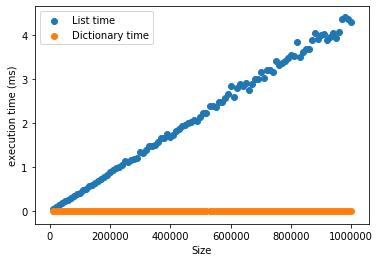

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(np.asarray(i_rec), np.asarray(list_time_rec))
plt.scatter(np.asarray(i_rec), np.asarray(dict_time_rec))

plt.legend(["List time", "Dictionary time"])
plt.xlabel("Size")
plt.ylabel("execution time (ms)")

plt.show()

It is should be clear that the execution time of `contain` operation for list and dictionary are `O(n)` and `O(1)`, respectively.

Since Python is an evolving language, there are always changes going on behind the scenes. The latest information on the performance of Python data structures can be found on the Python website https://wiki.python.org/moin/TimeComplexity.

## Master Theorem

What is the order of magnitude of function $T(n)$ which satsifies
$$T(n) = a T\left(\frac{n}{b}\right) + f(n)$$
Denote $c = \log_b a$, then
1. If $f(n) \in O(n^{c-\epsilon})$, where $\epsilon > 0$, then $T(n) \in \Theta(n^c)$.
2. If $f(n) \in \Theta \left(n^c \log^k n \right)$, then $T(n) \in \Theta \left(n^c \log^{k+1} n \right)$
3. If $f(n) \in \Omega(n^c)$, and $a f(\frac{n}{b}) \leq \gamma f(n)$ for some $\gamma < 1$. Then $T(n) \in \Theta(f(n))$.

Exercises:
1. $T(n) = 8T(n/2) + 1000 n^2$
2. $T(n) = 2T(n/2) + 10n$
3. $T(n) = 2T(n/2) + n^2$

<!---
Exercise: Let $T(n)$, $f(n)$, $g(n)$ be non-negative functions.

1. Prove that $T(n) \in o(f(n))$ implies $T(n) \in O(f(n))$.
2. Prove that $T(n) \in \omega(f(n))$ implies $T(n) \in \Omega(f(n))$.
3. Prove that $f(n) \in O(g(n))$ if and only if $g(n) \in \Omega(f(n))$.
4. Prove that $f(n) \in \Theta(g(n))$ if and only if $g(n) \in \Theta(f(n))$.
5. Prove that $f(n) \in o(g(n))$ if and only if $g(n) \in \omega(f(n))$.
6. Does $T(n) \in O(f(n))$ and $T(n) \not\in \Theta(f(n))$ implies $T(n) \in o(f(n))$? Please prove your statements.
7. Does $T(n) \in o(f(n))$ implies $T(n) \in O(f(n))$ and $T(n) \not\in \Theta(f(n))$? Please prove your statements.
8. Make a slide to illustrate a Python built-in list operation. Give your reference (such as the library code).
--->